# analysis after we built the data collection. now is Vector space

In [75]:
%matplotlib inline
import codecs
import re
import os
import matplotlib
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import numpy as np  # a conventional alias
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
#we need to see about the stopword list. 


In [5]:
print stoplist

set([u'\u8981', u'\u4e00', u'\u7684', u'\u5c06', u'\u6709', u'\u628a', u'\u4e0d', u'\u4e8c', u'\u4e0e', u'\u6211', u'\u4e09', u'\u5f97', u'\u90a3', u'\u5728', u'\u4e86', u'\u542c', u'\u662f', u'\u5230', u'\u5bb6', u'\u4eba', u'\u89c1', u'\u4e0a', u'\u65e0', u'\u53c8', u'\u4ed6', u'\u8fd9', u'\u4e5f', u'\u4f60', u'\u4e3a', u'\u6765', u'\u53ea', u'\u8bf4', u'\u597d'])


In [8]:
ls sqbs7_all_docs/

二黄原板.txt      二黄摇板.txt      西皮快板.txt      西皮摇板.txt
二黄慢板.txt      西皮原板.txt      西皮慢板.txt


In [78]:
for i in filenames:print i

sqbs7_all_docs/二黄原板.txt
sqbs7_all_docs/二黄慢板.txt
sqbs7_all_docs/二黄摇板.txt
sqbs7_all_docs/西皮原板.txt
sqbs7_all_docs/西皮快板.txt
sqbs7_all_docs/西皮慢板.txt
sqbs7_all_docs/西皮摇板.txt


In [74]:
stop_ori='我 一 不 你 把 了 是 来 在 他 的 有 将 见 人 与 得 要 到 听 那 又 为 上 这 三 只 好 二 说 无 家 也'
frwords=codecs.decode(stop_ori,'utf-8')
stoplist=set(frwords.split())
stoplist_ori=set(stop_ori.split())#not useful now

corpus_path = 'sqbs7_all_docs'
filenames=[os.path.join(corpus_path, fn) for fn in sorted(os.listdir(corpus_path))]
if 'sqbs7_all_docs/.DS_Store' in filenames:
    filenames.remove('sqbs7_all_docs/.DS_Store')



pat=re.compile(r'(?u)\b\w+\b',re.UNICODE )
vectorizer = CountVectorizer(input='filename',stop_words=stoplist,token_pattern=pat) 
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix 
vocab_list = vectorizer.get_feature_names()
type(dtm)                                         
dtm = dtm.toarray()  # convert to a regular array 
#note that vocab_list is a python list, vocab is a numpy array
vocab = np.array(vocab_list)




In [109]:
#what is the top words? in each document
def get_word_dist(i):
    """input is the index of the document, such as i=1 is the first document"""
    fdist=[]
    for word in vocab_list:
        #print word
        freq=dtm[i, vocab == word]
        fdist.append((word,freq[0]))

    rank=sorted(fdist, key=lambda x: x[1])[::-1]
    return rank

In [110]:
for i in range(7):
    print filenames[i]
    rank=get_word_dist(i)
    for words in rank[:20]:
        print words[0],words[1]

sqbs7_all_docs/二黄原板.txt
想 64
叫 64
里 58
去 50
此 45
娘 43
臣 42
小 41
都 40
本 40
孤 38
但愿 38
老 37
言 36
儿 36
下 35
能 34
声 34
个 34
难 33
sqbs7_all_docs/二黄慢板.txt
谁 16
臣 16
恨 16
坐 16
起 15
老 15
想 14
个 13
里 12
下 12
难 11
江山 11
曾 11
命 11
可怜 11
去 11
中 11
知 10
看 10
此 10
sqbs7_all_docs/二黄摇板.txt
去 70
叫 63
命 54
里 46
两 46
心 43
小 43
老 42
泪 42
儿 41
定 40
进 39
问 37
打 36
但愿 36
下 36
此 35
分明 34
声 33
再 32
sqbs7_all_docs/西皮原板.txt
叫 99
里 82
去 82
看 56
声 55
再 51
个 49
两 47
问 46
恨 46
言 45
分明 44
中 44
心 43
小 43
此 42
下 42
众 41
日 40
似 39
sqbs7_all_docs/西皮快板.txt
个 91
去 84
叫 78
孤 72
王 68
言 67
就 62
本 56
下 56
若 53
两 51
什么 50
老 49
难 48
小 48
再 48
斩 47
心 47
话 46
讲 44
sqbs7_all_docs/西皮慢板.txt
里 40
叫 32
去 32
奴 31
吾 23
个 22
用 21
本 20
事 20
老 19
才 19
想 19
都 18
言 18
自 18
坐 18
命 18
两 18
下 18
细 17
sqbs7_all_docs/西皮摇板.txt
去 258
叫 245
此 158
且 144
看 140
心 137
命 134
难 133
里 126
言 126
两 126
再 125
中 125
进 118
问 117
个 116
下 112
今日 111
事 111
孤 109


In [111]:
#after observing these top words from individual files, we need to add some entries to the stop list. Let's first see
#what if we take all words and see the top words

all_dtm=np.sum(dtm,axis=0)
def get_word_dist_all():
    """input is the index of the document, such as i=1 is the first document"""
    fdist=[]
    for word in vocab_list:
        #print word
        freq=all_dtm[vocab == word]
        fdist.append((word,freq[0]))

    rank=sorted(fdist, key=lambda x: x[1])[::-1]
    return rank

In [133]:

rank=get_word_dist_all()
for words in rank[:50]:
    print words[0],words[1],

叫 587 去 587 里 400 个 351 此 347 言 326 两 324 看 317 心 311 下 311 孤 308 命 308 小 301 再 293 中 292 难 288 声 287 老 284 想 275 问 263 且 261 本 260 事 256 能 245 话 240 进 239 分明 238 王 229 儿 225 大 221 臣 219 但愿 219 谁 217 今日 214 怎 213 出 213 恨 212 就 212 和 211 前 211 她 205 贼 204 似 204 定 201 才 200 哪 199 泪 195 日 191 太 191 朝 190


In [ ]:
#it seems like these are all pretty meaningless. The thing is that either this would mean we want more in the stop list,
#or this says something about the quality of segmentation. but what if we used all one character words tokenization? 
#worse? hard to imagine.

#since there are other devices like tf-idf weighting, we're going to leave words in for now. top words in frequency 
#doesn't mean topic words. 

## cosine similarity between 7 docs

In [134]:
In [24]: from sklearn.metrics.pairwise import cosine_similarity

In [25]: dist = 1 - cosine_similarity(dtm)

In [26]: np.round(dist, 2)

array([[ 0.  ,  0.28,  0.2 ,  0.19,  0.22,  0.24,  0.19],
       [ 0.28,  0.  ,  0.36,  0.32,  0.35,  0.33,  0.35],
       [ 0.2 ,  0.36,  0.  ,  0.21,  0.22,  0.29,  0.13],
       [ 0.19,  0.32,  0.21, -0.  ,  0.18,  0.2 ,  0.13],
       [ 0.22,  0.35,  0.22,  0.18,  0.  ,  0.26,  0.14],
       [ 0.24,  0.33,  0.29,  0.2 ,  0.26,  0.  ,  0.24],
       [ 0.19,  0.35,  0.13,  0.13,  0.14,  0.24, -0.  ]])

In [136]:

In [34]: import os  # for os.path.basename

In [35]: import matplotlib.pyplot as plt

In [36]: from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
In [37]: mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

In [38]: pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

In [137]:
In [39]: xs, ys = pos[:, 0], pos[:, 1]
In [40]: names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

In [139]:
for i in names:print i

二黄原板
二黄慢板
二黄摇板
西皮原板
西皮快板
西皮慢板
西皮摇板


In [153]:
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

In [163]:
names

['\xe4\xba\x8c\xe9\xbb\x84\xe5\x8e\x9f\xe6\x9d\xbf',
 '\xe4\xba\x8c\xe9\xbb\x84\xe6\x85\xa2\xe6\x9d\xbf',
 '\xe4\xba\x8c\xe9\xbb\x84\xe6\x91\x87\xe6\x9d\xbf',
 '\xe8\xa5\xbf\xe7\x9a\xae\xe5\x8e\x9f\xe6\x9d\xbf',
 '\xe8\xa5\xbf\xe7\x9a\xae\xe5\xbf\xab\xe6\x9d\xbf',
 '\xe8\xa5\xbf\xe7\x9a\xae\xe6\x85\xa2\xe6\x9d\xbf',
 '\xe8\xa5\xbf\xe7\x9a\xae\xe6\x91\x87\xe6\x9d\xbf']

## This plotting works out in the command line. see script

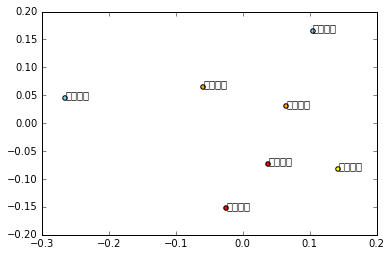

In [168]:
# -*- coding: utf-8 -*-

from __future__ import unicode_literals

for x, y, name in zip(xs, ys, names):
    
    if '原板' in name:
        color = 'orange'
        print 'uyes'
    elif '慢板' in name:
        color = 'skyblue'
    elif '摇板' in name:
        color = 'red'
    elif '快板' in name:
        color = 'yellow'
        
    plt.scatter(x, y, c=color)
    nameu=codecs.decode(name,'utf-8')
    print name
    plt.text(x, y, name) 



# doing NMF 